In [74]:
import numpy as np
import pandas as pd
import openpyxl

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn import linear_model


from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error




In [75]:
df = pd.read_excel('Largest Companies in the World.xlsx')
df.head()

,Global Rank,Company,Sales ($billion),Profits ($billion),Assets ($billion),Market Value ($billion),Country,Continent,Latitude,Longitude
0,1,ICBC,134.8,37.8,2813.5,237.3,China,Asia,35.86166,104.195397
1,2,China Construction Bank,113.1,30.6,2241.0,202.0,China,Asia,35.86166,104.195397
2,3,JPMorgan Chase,108.2,21.3,2359.1,191.4,USA,North America,37.09024,-95.712891
3,4,General Electric,147.4,13.6,685.3,243.7,USA,North America,37.09024,-95.712891
4,5,Exxon Mobil,420.7,44.9,333.8,400.4,USA,North America,37.09024,-95.712891


In [76]:
df.shape

(1924, 10)

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1924 entries, 0 to 1923
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Global Rank              1924 non-null   int64  
 1   Company                  1924 non-null   object 
 2   Sales ($billion)         1924 non-null   float64
 3   Profits ($billion)       1924 non-null   float64
 4   Assets ($billion)        1924 non-null   float64
 5   Market Value ($billion)  1924 non-null   float64
 6   Country                  1924 non-null   object 
 7   Continent                1924 non-null   object 
 8   Latitude                 1924 non-null   float64
 9   Longitude                1924 non-null   float64
dtypes: float64(6), int64(1), object(3)
memory usage: 150.4+ KB


In [78]:
df1 = df.copy()

# EDA

In [79]:
df1.isnull().sum()

Global Rank                0
Company                    0
Sales ($billion)           0
Profits ($billion)         0
Assets ($billion)          0
Market Value ($billion)    0
Country                    0
Continent                  0
Latitude                   0
Longitude                  0
dtype: int64

In [80]:
df1.rename(columns = {"Global Rank":"rank","Sales ($billion)":"Sales_bill","Profits ($billion)":"profits_bill","Assets ($billion)":"assets_bill","Market Value ($billion)":"market_value_bill"},inplace =True)
df1.columns

Index(['rank', 'Company', 'Sales_bill', 'profits_bill', 'assets_bill',
       'market_value_bill', 'Country', 'Continent', 'Latitude', 'Longitude'],
      dtype='object')

In [81]:
df1[['rank','Company', 'market_value_bill','Country']].loc[(df1['rank']>= 1) &(df1['rank']<= 15)]

,rank,Company,market_value_bill,Country
0,1,ICBC,237.3,China
1,2,China Construction Bank,202.0,China
2,3,JPMorgan Chase,191.4,USA
3,4,General Electric,243.7,USA
4,5,Exxon Mobil,400.4,USA
5,6,HSBC Holdings,201.3,UK
6,7,Royal Dutch Shell,213.1,The Netherlands
7,8,Agricultural Bank of China,150.8,China
8,9,PetroChina,261.2,China
9,9,Berkshire Hathaway,252.8,USA


In [82]:
df1[df1['rank'].duplicated() == True]

,rank,Company,Sales_bill,profits_bill,assets_bill,market_value_bill,Country,Continent,Latitude,Longitude
9,9,Berkshire Hathaway,162.5,14.8,427.5,252.8,USA,North America,37.090240,-95.712891
15,15,Apple,164.7,41.7,196.1,416.6,USA,North America,37.090240,-95.712891
20,20,Samsung Electronics,187.8,21.7,196.3,174.4,South Korea,Asia,35.907757,127.766922
45,46,Johnson & Johnson,67.2,10.9,121.3,221.4,USA,North America,37.090240,-95.712891
50,51,Sumitomo Mitsui Financial,47.3,6.3,1733.2,57.6,Japan,Asia,36.204824,138.252924
...,...,...,...,...,...,...,...,...,...,...
1901,1975,Fuji Electric,8.5,0.1,9.6,2.1,Japan,Asia,36.204824,138.252924
1903,1977,Ford Otosan,5.5,0.4,2.6,4.5,Turkey,Europe,38.963745,35.243322
1909,1984,Cimarex Energy,1.6,0.4,6.3,6.8,USA,North America,37.090240,-95.712891
1912,1987,IMI,3.5,0.4,2.8,6.6,UK,Europe,55.378051,-3.435973


In [83]:
[df1[df1['rank'].duplicated() == True].count()]

[rank                 282
 Company              282
 Sales_bill           282
 profits_bill         282
 assets_bill          282
 market_value_bill    282
 Country              282
 Continent            282
 Latitude             282
 Longitude            282
 dtype: int64]

In [84]:
df1.isna().sum()

rank                 0
Company              0
Sales_bill           0
profits_bill         0
assets_bill          0
market_value_bill    0
Country              0
Continent            0
Latitude             0
Longitude            0
dtype: int64

In [85]:
#List of top 25 companies with highest number of companies in the dataset

df1['Country'].value_counts()[0:25]

USA                535
Japan              246
China              135
UK                  97
Canada              65
South Korea         64
France              64
India               56
Germany             50
Hong Kong           46
Australia           42
Taiwan              40
Brazil              31
Russia              30
Italy               29
Spain               28
Sweden              26
The Netherlands     24
Singapore           20
Malaysia            20
South Africa        19
Mexico              19
Saudi Arabia        17
Ireland             17
Thailand            16
Name: Country, dtype: int64

# Visualisation

<Axes: >

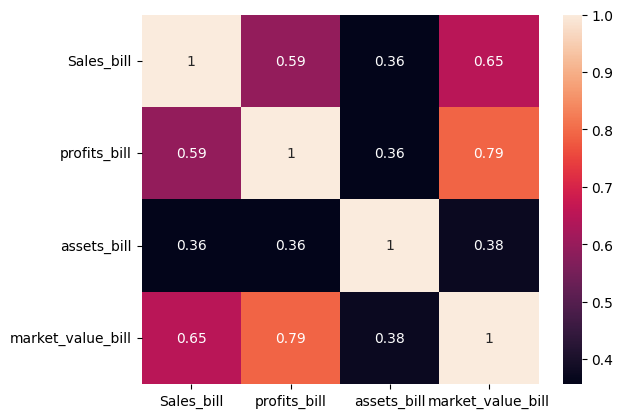

In [86]:
# Finding correlation in nominal features

sns.heatmap(df1[['Sales_bill', 'profits_bill', 'assets_bill','market_value_bill']].corr(),annot=True)

/Users/saptarshipal/Documents/data/Largest_companies/Largest_companies/cvp_venv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


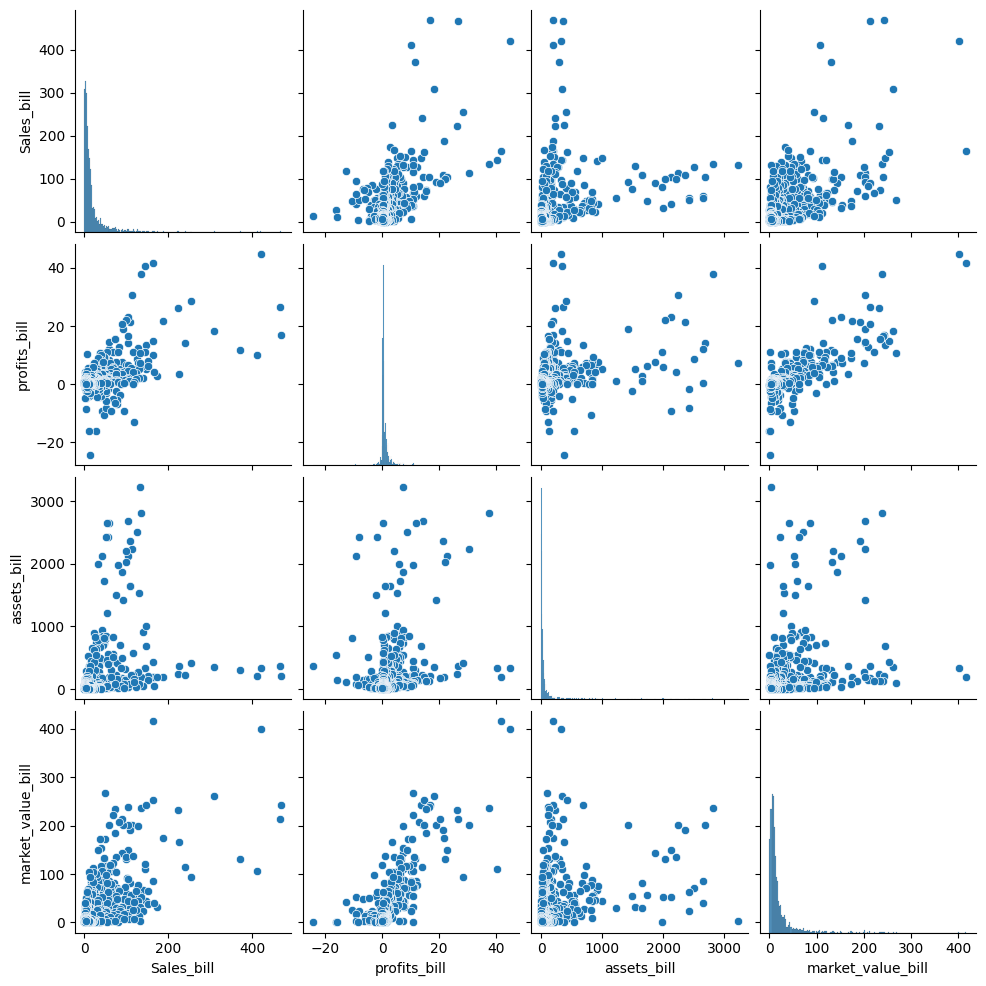

In [87]:
# Finding distribution in nominal features

sns.pairplot(df1[['Sales_bill', 'profits_bill', 'assets_bill','market_value_bill']])
plt.show()

The data is not normally distributed.

# Preprocessing

In [88]:
#Drop rank as we will be determining the rank of the company as per our assessment. Also dropping the name of the companies.

def preprocess_inputs(df1):
    
    df1 = df1.copy()
    
    #Drop unused columns
    df1 =df1.drop(['rank','Company','Latitude','Longitude'],axis=1)
    
    # One-hot encode nominal feature columns
    for column in ['Country', 'Continent']:
        dummies = pd.get_dummies(df1[column])
        df1 = pd.concat([df1, dummies], axis=1)
        df1 = df1.drop(column, axis=1)
        
    # Split df into X and y
    y = df1['market_value_bill']
    X = df1.drop('market_value_bill', axis=1)
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=150)
    
    # Scale X
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
    X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)
    
    return X_train, X_test, y_train, y_test


preprocess_inputs(df1)

(      Sales_bill  profits_bill  assets_bill  Australia   Belgium   Bermuda  \
 127     2.647441     -0.107000     0.604816  -0.158535 -0.072303 -0.066915   
 1625   -0.122071     -0.636706    -0.270008  -0.158535 -0.072303 -0.066915   
 124     4.033574      0.834701    -0.112458  -0.158535 -0.072303 -0.066915   
 1400   -0.430713     -0.254140    -0.275273  -0.158535 -0.072303 -0.066915   
 97      0.478679      2.747531     0.014310  -0.158535 -0.072303 -0.066915   
 ...          ...           ...          ...        ...       ...       ...   
 496    -0.226789      0.010713    -0.192650  -0.158535 -0.072303 -0.066915   
 25     10.801655      2.600390     0.502754  -0.158535 -0.072303 -0.066915   
 1531   -0.235056     -0.342425    -0.255022  -0.158535 -0.072303 -0.066915   
 442    -0.400400      2.659247    -0.140809  -0.158535 -0.072303 -0.066915   
 1252   -0.350797     -0.254140    -0.292283  -0.158535 -0.072303 -0.066915   
 
         Brazil    Canada  Channel Islands     Chi

In [89]:
X_train, X_test, y_train, y_test = preprocess_inputs(df1)

In [90]:
X_train

,Sales_bill,profits_bill,assets_bill,Australia,Belgium,Bermuda,Brazil,Canada,Channel Islands,Chile,...,USA,United Arab Emirates,Venezuela,Vietnam,Africa,Asia,Europe,North America,Oceania,South America
127,2.647441,-0.107000,0.604816,-0.158535,-0.072303,-0.066915,-0.134738,-0.177250,-0.027267,-0.066915,...,1.585673,-0.066915,-0.027267,-0.027267,-0.1131,-0.766332,-0.555037,1.422926,-0.158535,-0.165774
1625,-0.122071,-0.636706,-0.270008,-0.158535,-0.072303,-0.066915,-0.134738,-0.177250,-0.027267,-0.066915,...,-0.630647,-0.066915,-0.027267,-0.027267,-0.1131,-0.766332,1.801682,-0.702777,-0.158535,-0.165774
124,4.033574,0.834701,-0.112458,-0.158535,-0.072303,-0.066915,-0.134738,-0.177250,-0.027267,-0.066915,...,1.585673,-0.066915,-0.027267,-0.027267,-0.1131,-0.766332,-0.555037,1.422926,-0.158535,-0.165774
1400,-0.430713,-0.254140,-0.275273,-0.158535,-0.072303,-0.066915,-0.134738,-0.177250,-0.027267,-0.066915,...,-0.630647,-0.066915,-0.027267,-0.027267,-0.1131,1.304918,-0.555037,-0.702777,-0.158535,-0.165774
97,0.478679,2.747531,0.014310,-0.158535,-0.072303,-0.066915,-0.134738,-0.177250,-0.027267,-0.066915,...,1.585673,-0.066915,-0.027267,-0.027267,-0.1131,-0.766332,-0.555037,1.422926,-0.158535,-0.165774
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,-0.226789,0.010713,-0.192650,-0.158535,-0.072303,-0.066915,-0.134738,-0.177250,-0.027267,-0.066915,...,-0.630647,-0.066915,-0.027267,-0.027267,-0.1131,1.304918,-0.555037,-0.702777,-0.158535,-0.165774
25,10.801655,2.600390,0.502754,-0.158535,-0.072303,-0.066915,-0.134738,-0.177250,-0.027267,-0.066915,...,-0.630647,-0.066915,-0.027267,-0.027267,-0.1131,1.304918,-0.555037,-0.702777,-0.158535,-0.165774
1531,-0.235056,-0.342425,-0.255022,-0.158535,-0.072303,-0.066915,-0.134738,-0.177250,-0.027267,-0.066915,...,-0.630647,-0.066915,-0.027267,-0.027267,-0.1131,1.304918,-0.555037,-0.702777,-0.158535,-0.165774
442,-0.400400,2.659247,-0.140809,-0.158535,-0.072303,-0.066915,-0.134738,-0.177250,-0.027267,-0.066915,...,-0.630647,-0.066915,-0.027267,-0.027267,-0.1131,-0.766332,1.801682,-0.702777,-0.158535,-0.165774


In [91]:
y_train

127     137.3
1625      1.6
124      39.9
1400     11.5
97      172.0
        ...  
496      12.6
25      106.9
1531      1.6
442      24.5
1252      9.7
Name: market_value_bill, Length: 1346, dtype: float64

# Training

In [100]:
#Linear regression

lin_r = linear_model.LinearRegression()
lin_r.fit(X_train,y_train)
lin_r_pred = lin_r.predict(X_test)

In [101]:
#Logistic Regression

log_r =linear_model.LogisticRegression()
log_r.fit(X_train,y_train)
log_r_pred = log_r.predict(X_test)

ValueError: Unknown label type: 'continuous'

In [ ]:
models = ['Linear regression', 'Logistic Regression']
RSE = [r2_score(y_test,lin_r_pred), r2_score(y_test,log_r_pred)]
MAE = [mean_absolute_error(y_test,lin_r_pred), mean_absolute_error(y_test,log_r_pred)]
MSE = [mean_squared_error(y_test,lin_r_pred), mean_squared_error(y_test,log_r_pred)]

In [ ]:
Model_comparison = pd.DataFrame({'Model':models, 'RSE': RSE, 'MAE': MAE, 'MSE': MSE }, sorted =True)

Model_comparison

In [99]:
print('RSE: ',r2_score(y_test,lin_r_pred))
print('MAE: ',mean_absolute_error(y_test,lin_r_pred))
print('MSE: ',mean_squared_error(y_test,lin_r_pred))

RSE:  -6.484832945803571e+24
MAE:  7018657950213.588
MSE:  6.749533371225636e+27
